### SVM Kernels Indepth Intuition And Practical Explanation

In [59]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10.0, 10.0, 100)
y = np.sqrt(10**2 - x**2)
y=np.hstack([y,-y])
x=np.hstack([x,-x])

In [ ]:
x1 = np.linspace(-10.0, 10.0, 100)
y1 = np.sqrt(5**2 - x1**2)
y1=np.hstack([y1,-y1])
x1=np.hstack([x1,-x1])

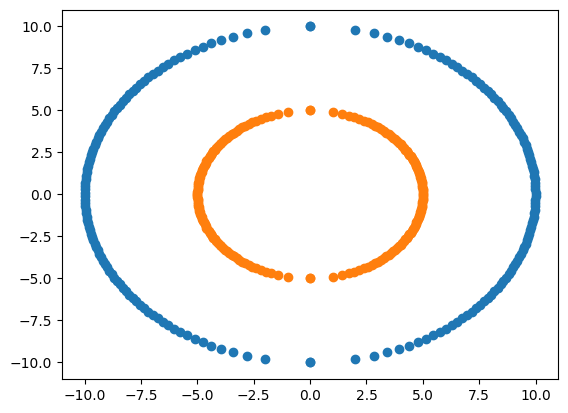

In [62]:
plt.scatter(y,x)
plt.scatter(y1,x1)
plt.show()

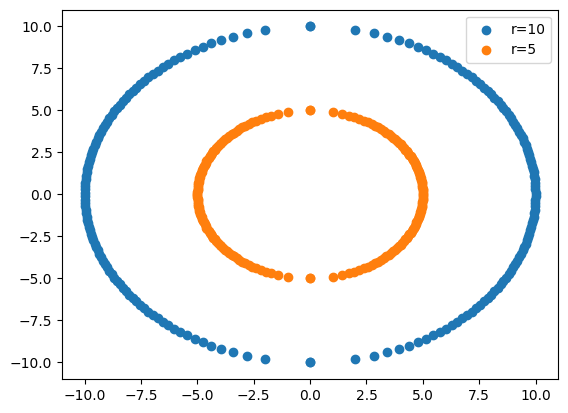

In [63]:
plt.scatter(y,x,label='r=10')
plt.scatter(y1,x1,label='r=5')
plt.legend()
plt.show()

In [45]:
import pandas as pd
df1 =pd.DataFrame(np.vstack([y,x]).T,columns=['X1','X2'])
df1['Y']=0
df2 =pd.DataFrame(np.vstack([y1,x1]).T,columns=['X1','X2'])
df2['Y']=1
# df = df1.append(df2)
df = pd.concat([df1, df2], ignore_index=True)
df.head(5)

,X1,X2,Y
0,0.000000,-10.000000,0
1,1.999898,-9.797980,0
2,2.813816,-9.595960,0
3,3.428397,-9.393939,0
4,3.938099,-9.191919,0


In [46]:
### Independent and Dependent features
X = df.iloc[:, :2]  
y = df.Y

In [47]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: Y, Length: 400, dtype: int64

In [48]:
## Split the dataset into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [49]:
y_train

250    1
63     0
312    1
159    0
283    1
      ..
323    1
192    0
117    0
47     0
172    0
Name: Y, Length: 300, dtype: int64

In [50]:
from sklearn.svm import SVC
classifier=SVC(kernel="linear")
classifier.fit(X_train,y_train)

SVC(kernel='linear')

In [51]:
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.48

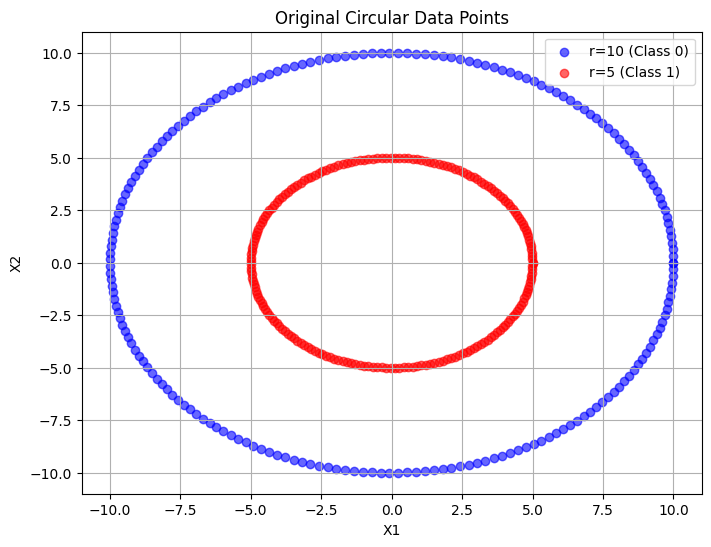

In [70]:
# Re-generate circular data points for two different radii with matching lengths
theta = np.linspace(0, 2 * np.pi, 200)

# Outer circle (r=10)
x_outer = 10 * np.cos(theta)
y_outer = 10 * np.sin(theta)

# Inner circle (r=5)
x_inner = 5 * np.cos(theta)
y_inner = 5 * np.sin(theta)

# Plot original circular data points with correct colors
plt.figure(figsize=(8, 6))
plt.scatter(x_outer, y_outer, color='blue', alpha=0.6, label='r=10 (Class 0)')
plt.scatter(x_inner, y_inner, color='red', alpha=0.6, label='r=5 (Class 1)')
plt.legend()
plt.title("Original Circular Data Points")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid()
plt.show()




Model Accuracy: 0.49


c:\Users\HP\miniconda3\envs\ML\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names



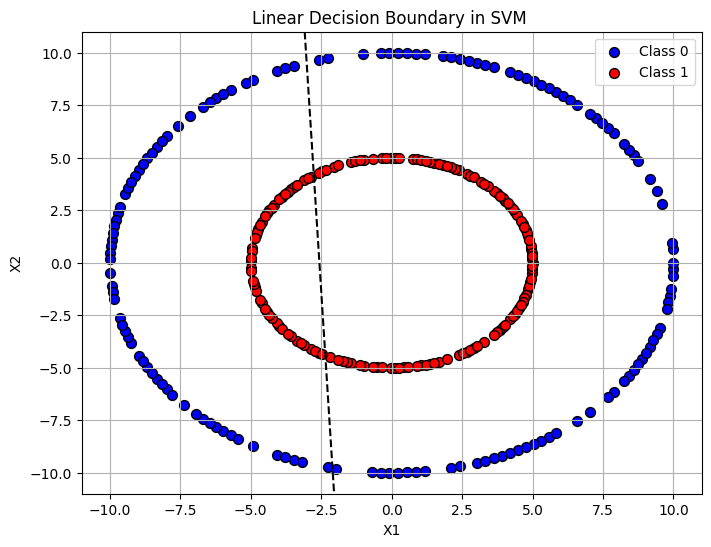

In [71]:
# Create DataFrame and assign labels
df_outer = pd.DataFrame({'X1': x_outer, 'X2': y_outer, 'Y': 0})  # Outer circle (Class 0)
df_inner = pd.DataFrame({'X1': x_inner, 'X2': y_inner, 'Y': 1})  # Inner circle (Class 1)

# Combine datasets
df = pd.concat([df_outer, df_inner], ignore_index=True)

# Split features and labels
X = df[['X1', 'X2']]
y = df['Y']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Train SVM with a linear kernel
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train)

# Compute accuracy
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Plot decision boundary with original colors
plt.figure(figsize=(8, 6))
for label, color in zip([0, 1], ['blue', 'red']):
    plt.scatter(X_train[y_train == label]['X1'], X_train[y_train == label]['X2'], 
                color=color, edgecolors='k', s=50, label=f"Class {label}")

# Create grid to visualize decision boundary
xx, yy = np.meshgrid(np.linspace(X['X1'].min()-1, X['X1'].max()+1, 500), 
                     np.linspace(X['X2'].min()-1, X['X2'].max()+1, 500))
Z = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contour(xx, yy, Z, colors='black', levels=[0], linestyles=['dashed'])

plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Linear Decision Boundary in SVM ")
plt.legend()
plt.grid()
plt.show()

In [52]:
df.head()

,X1,X2,Y
0,0.000000,-10.000000,0
1,1.999898,-9.797980,0
2,2.813816,-9.595960,0
3,3.428397,-9.393939,0
4,3.938099,-9.191919,0


### Polynomial Kernel
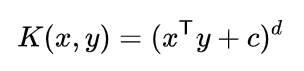

In [72]:
# We need to find components for the Polynomical Kernel
#X1,X2,X1_square,X2_square,X1*X2
df['X1_Square']= df['X1']**2
df['X2_Square']= df['X2']**2
df['X1*X2'] = (df['X1'] *df['X2'])
df.head()

,X1,X2,Y,X1_Square,X2_Square,X1*X2
0,10.000000,0.000000,0,100.000000,0.000000,0.000000
1,9.995016,0.315685,0,99.900343,0.099657,3.155282
2,9.980069,0.631056,0,99.601768,0.398232,6.297985
3,9.955173,0.945798,0,99.105466,0.894534,9.415583
4,9.920354,1.259597,0,98.413415,1.586585,12.495648


In [73]:
### Independent and Dependent features
X = df[['X1','X2','X1_Square','X2_Square','X1*X2']]
y = df['Y']

In [74]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: Y, Length: 400, dtype: int64

In [75]:

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = 0)


In [38]:
X_train

,X1,X2,X1_Square,X2_Square,X1*X2
250,4.999745,0.050505,24.997449,0.002551,0.252512
63,1.000000,1.363636,1.000000,1.859504,1.363636
312,-3.263736,3.787879,10.651974,14.348026,-12.362637
159,1.000000,-0.959596,1.000000,0.920824,-0.959596
283,3.680983,3.383838,13.549638,11.450362,12.455852
...,...,...,...,...,...
323,-4.223140,2.676768,17.834915,7.165085,-11.304366
192,1.000000,-4.292929,1.000000,18.429242,-4.292929
117,1.000000,3.282828,1.000000,10.776962,3.282828
47,1.000000,-0.252525,1.000000,0.063769,-0.252525


In [81]:
import plotly.express as px

fig = px.scatter_3d(df, x='X1', y='X2', z='X1*X2',
              color='Y')
fig.show()

In [82]:

fig = px.scatter_3d(df, x='X1_Square', y='X1_Square', z='X1*X2',
              color='Y')
fig.show()

In [41]:
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.97

In [78]:
import plotly.express as px

# Compute polynomial components for feature expansion
df['X1_Square'] = df['X1'] ** 2
df['X2_Square'] = df['X2'] ** 2
df['X1*X2'] = df['X1'] * df['X2']

# Define independent (X) and dependent (y) variables
X = df[['X1', 'X2', 'X1_Square', 'X2_Square', 'X1*X2']]
y = df['Y']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# 3D Scatter Plot with Polynomial Features
fig = px.scatter_3d(df, x='X1', y='X2', z='X1*X2', color=df['Y'].astype(str),
                     title="3D Visualization of Polynomial Feature X1*X2")
fig.show()


In [79]:
# 3D Scatter Plot with Polynomial Features
fig = px.scatter_3d(df, x='X1_Square', y='X1_Square', z='X1*X2', color=df['Y'].astype(str),
                     title="3D Visualization of Polynomial Feature X1*X2")
fig.show()


In [80]:
# Re-attempting the 3D scatter plot with polynomial features
fig = px.scatter_3d(df, x='X1', y='X2', z='X1*X2', color=df['Y'].astype(str),
                     title="3D Visualization of Polynomial Feature X1*X2")
fig.show()
